In [40]:
#Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from pandas.plotting import parallel_coordinates

#Metrics
from sklearn import metrics
from sklearn.metrics import make_scorer, accuracy_score,precision_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score ,precision_score,recall_score,f1_score

#Model Select
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier

In [21]:
#Reading data set
data = pd.read_csv("penguins1.csv")
print(data.head())
print(data.describe(include='all'))
data.info()

  species  bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g
0  Adelie            39.1           18.7                181         3750
1  Adelie            39.5           17.4                186         3800
2  Adelie            40.3           18.0                195         3250
3  Adelie            36.7           19.3                193         3450
4  Adelie            39.3           20.6                190         3650
       species  bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g
count      342      342.000000     342.000000         342.000000   342.000000
unique       3             NaN            NaN                NaN          NaN
top     Adelie             NaN            NaN                NaN          NaN
freq       151             NaN            NaN                NaN          NaN
mean       NaN       43.921930      17.151170         200.915205  4201.754386
std        NaN        5.459584       1.974793          14.061714   801.954536
min        NaN  

In [22]:
#Frequency distribution of species
# Make a crosstab and name the count column
pd.crosstab(index=data["species"], columns="count") 

col_0,count
species,
Adelie,151
Chinstrap,68
Gentoo,123


In [42]:
#Feature selection
X = data.iloc[:,1:5].values #bill_length_mm, bill_depth_mm, flipper_length_mm, body_mass_g
y = data.iloc[:,0].values  #species

#Label encoding: 
#categorical labels are transformed into numbers
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

#Split the data set before classification
#Train set: 70% of data to train the model
#Test set: 15% of data to test the model
#Validation set: 15% of data used to evaluate 
#the performance of each classifier and fine-tune 
#the model parameters
#Now we have small data set, therefore test set = validation set
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

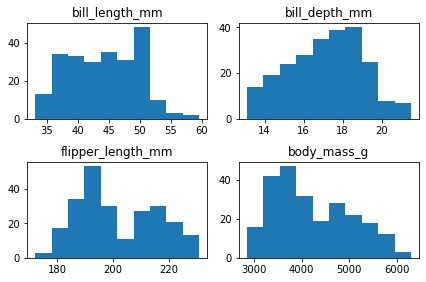

In [43]:
#Explore the TRAINING data
train = pd.DataFrame(X_train)

#Create histograms for each feature
n_bins = 10
fig, axs = plt.subplots(2, 2)
axs[0,0].hist(train.iloc[:,0].values, bins = n_bins);
axs[0,0].set_title('bill_length_mm');
axs[0,1].hist(train.iloc[:,1].values, bins = n_bins);
axs[0,1].set_title('bill_depth_mm');
axs[1,0].hist(train.iloc[:,2].values, bins = n_bins);
axs[1,0].set_title('flipper_length_mm');
axs[1,1].hist(train.iloc[:,3].values, bins = n_bins);
axs[1,1].set_title('body_mass_g');
# add some spacing between subplots
fig.tight_layout(pad=1.0);

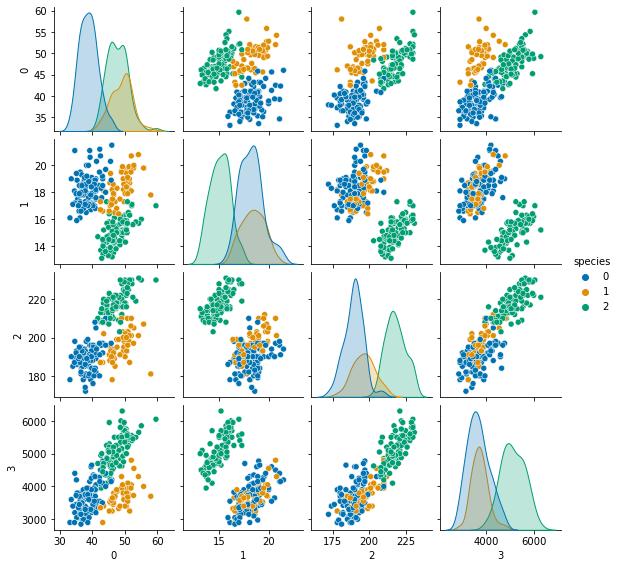

In [44]:
#Scatter plots of all attribute pairs
train['species'] = pd.DataFrame(y_train)
sns.pairplot(train, hue="species", height = 2, palette = 'colorblind');

#Conclusion:
#Petal measurements can separate species better than the sepal ones.

The accuracy of the Decision Tree is 0.932
[0.35155641 0.09029073 0.5229937  0.03515917]
|--- feature_2 <= 206.50
|   |--- feature_0 <= 43.35
|   |   |--- feature_0 <= 42.40
|   |   |   |--- class: 0
|   |   |--- feature_0 >  42.40
|   |   |   |--- class: 0
|   |--- feature_0 >  43.35
|   |   |--- feature_3 <= 4125.00
|   |   |   |--- class: 1
|   |   |--- feature_3 >  4125.00
|   |   |   |--- class: 0
|--- feature_2 >  206.50
|   |--- feature_1 <= 17.65
|   |   |--- class: 2
|   |--- feature_1 >  17.65
|   |   |--- feature_1 <= 18.95
|   |   |   |--- class: 0
|   |   |--- feature_1 >  18.95
|   |   |   |--- class: 1



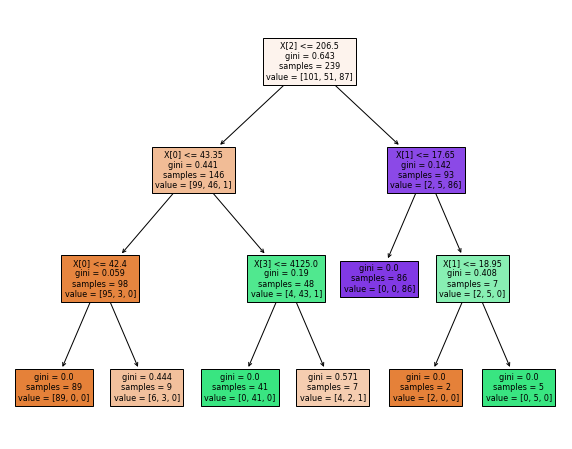

In [50]:
#Decision tree

#Create the tree
mod_dt = DecisionTreeClassifier(max_depth = 3, random_state = 1)
#Train the model
mod_dt.fit(X_train,y_train)
#Test the model
prediction=mod_dt.predict(X_test)
#Print accuracy
print('The accuracy of the Decision Tree is',"{:.3f}".format(metrics.accuracy_score(prediction,y_test)))
#Print the importance of each predictor
print(mod_dt.feature_importances_)

#Conclusion:
#The decision tree predicts 98.3% of data correctly.
#Only the petal measurements are used to build the tree.

# Print text representation
text_representation = tree.export_text(mod_dt)
print(text_representation)

# Save to file
with open("decistion_tree.log", "w") as fout:
    fout.write(text_representation)

#Visualization of decision tree
plt.figure(figsize = (10,8))
plot_tree(mod_dt, filled = True);